 # More on Data Preprocessing and Feature Engineering: Agent Calls Sample Dataset

In [ ]:
__author__ = 'Cristian B. Jetomo'

In [9]:
!pip install numpy pandas matplotlib missingno

In [2]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import missingno

**Overview**

In this Jupyter notebook, our goal is to get our hands dirty and dig deep into data preprocessing and feature engineering techniques. We do this by focusing on an call-level dataset where we look into the performance of agents and a company in terms of calls handling and other metrics. Particularly, we'll be working with the *Telecom Company Call Center dataset*, the description of which is given in the following.

**Data Description**

The dataset contains 3 months of calls (from January-March 2021) received by the Telecom company. The data is categorized into the following columns:

- *Call Id* - Unique call identifier.
- *Agent* - Name of agent that received the call.
- *Date* - Date of call.
- *Time* - Time of call.
- *Topic* - concerned topic during the call.
- *Answered (Y/N)* - Whether or not the call is answered by the agent.
- *Resolved* - Whether or not the concern is resolved during the call.
- *Speed of answer in seconds* - amount of time it took for the call to be answered by the agent upon receiving.
- *AvgTalkDuration* - average talk duration.
- *Satisfaction rating* - rating from 1-5 received by the agent from the customer where 1 is the unsatisficatory and 5 is excellent.

In [3]:
# load dataset
df = pd.read_excel("resources/agent_level_calls.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


## Data Cleaning and Preprocessing
Changing first the data columns to their correct formatting ...

In [4]:
# !! Answer Me!! combine date & time as a single column and correct the dtype
df['Date-Time'] = df['Date'].astype('str') + " " + df['Time'].astype('str')

df['Date-Time'] = pd.to_datetime(df['Date-Time'])

# check if all are converted correctly
df['Date-Time'].isna().value_counts()

Date-Time
False    5000
Name: count, dtype: int64

In [5]:
# observe and correct the AvgTalkDuration column
df['AvgTalkDuration']  # data is in hh:mm:ss format

# convert formatting to seconds
df['AvgTalkDuration'] = pd.to_timedelta(df['AvgTalkDuration'].astype('str')).dt.total_seconds()

# check if all are converted correctly
df['AvgTalkDuration'].isna().value_counts()

AvgTalkDuration
False    4054
True      946
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   object        
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   float64       
 9   Satisfaction rating         4054 non-null   float64       
 10  Date-Time                   5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage

In [6]:
# sort data according to date
df.sort_values(by='Date-Time', inplace=True)

In [7]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Date-Time
0,ID0001,Diane,2021-01-01,09:12:58,Complaint,Y,Y,109.0,143.0,3.0,2021-01-01 09:12:58
1,ID0002,Becky,2021-01-01,09:12:58,Appointment,Y,N,70.0,242.0,3.0,2021-01-01 09:12:58
2,ID0003,Stewart,2021-01-01,09:47:31,Complaint,Y,Y,10.0,131.0,3.0,2021-01-01 09:47:31
3,ID0004,Greg,2021-01-01,09:47:31,Complaint,Y,Y,53.0,37.0,2.0,2021-01-01 09:47:31
4,ID0005,Becky,2021-01-01,10:00:29,Insurance or Billing,Y,Y,95.0,60.0,3.0,2021-01-01 10:00:29
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Insurance or Billing,Y,Y,22.0,340.0,1.0,2021-03-31 16:37:55
4996,ID4997,Diane,2021-03-31,16:45:07,Insurance or Billing,Y,Y,100.0,196.0,3.0,2021-03-31 16:45:07
4997,ID4998,Diane,2021-03-31,16:53:46,Insurance or Billing,Y,Y,84.0,109.0,4.0,2021-03-31 16:53:46
4998,ID4999,Jim,2021-03-31,17:02:24,Medical Consultation,Y,Y,98.0,58.0,5.0,2021-03-31 17:02:24


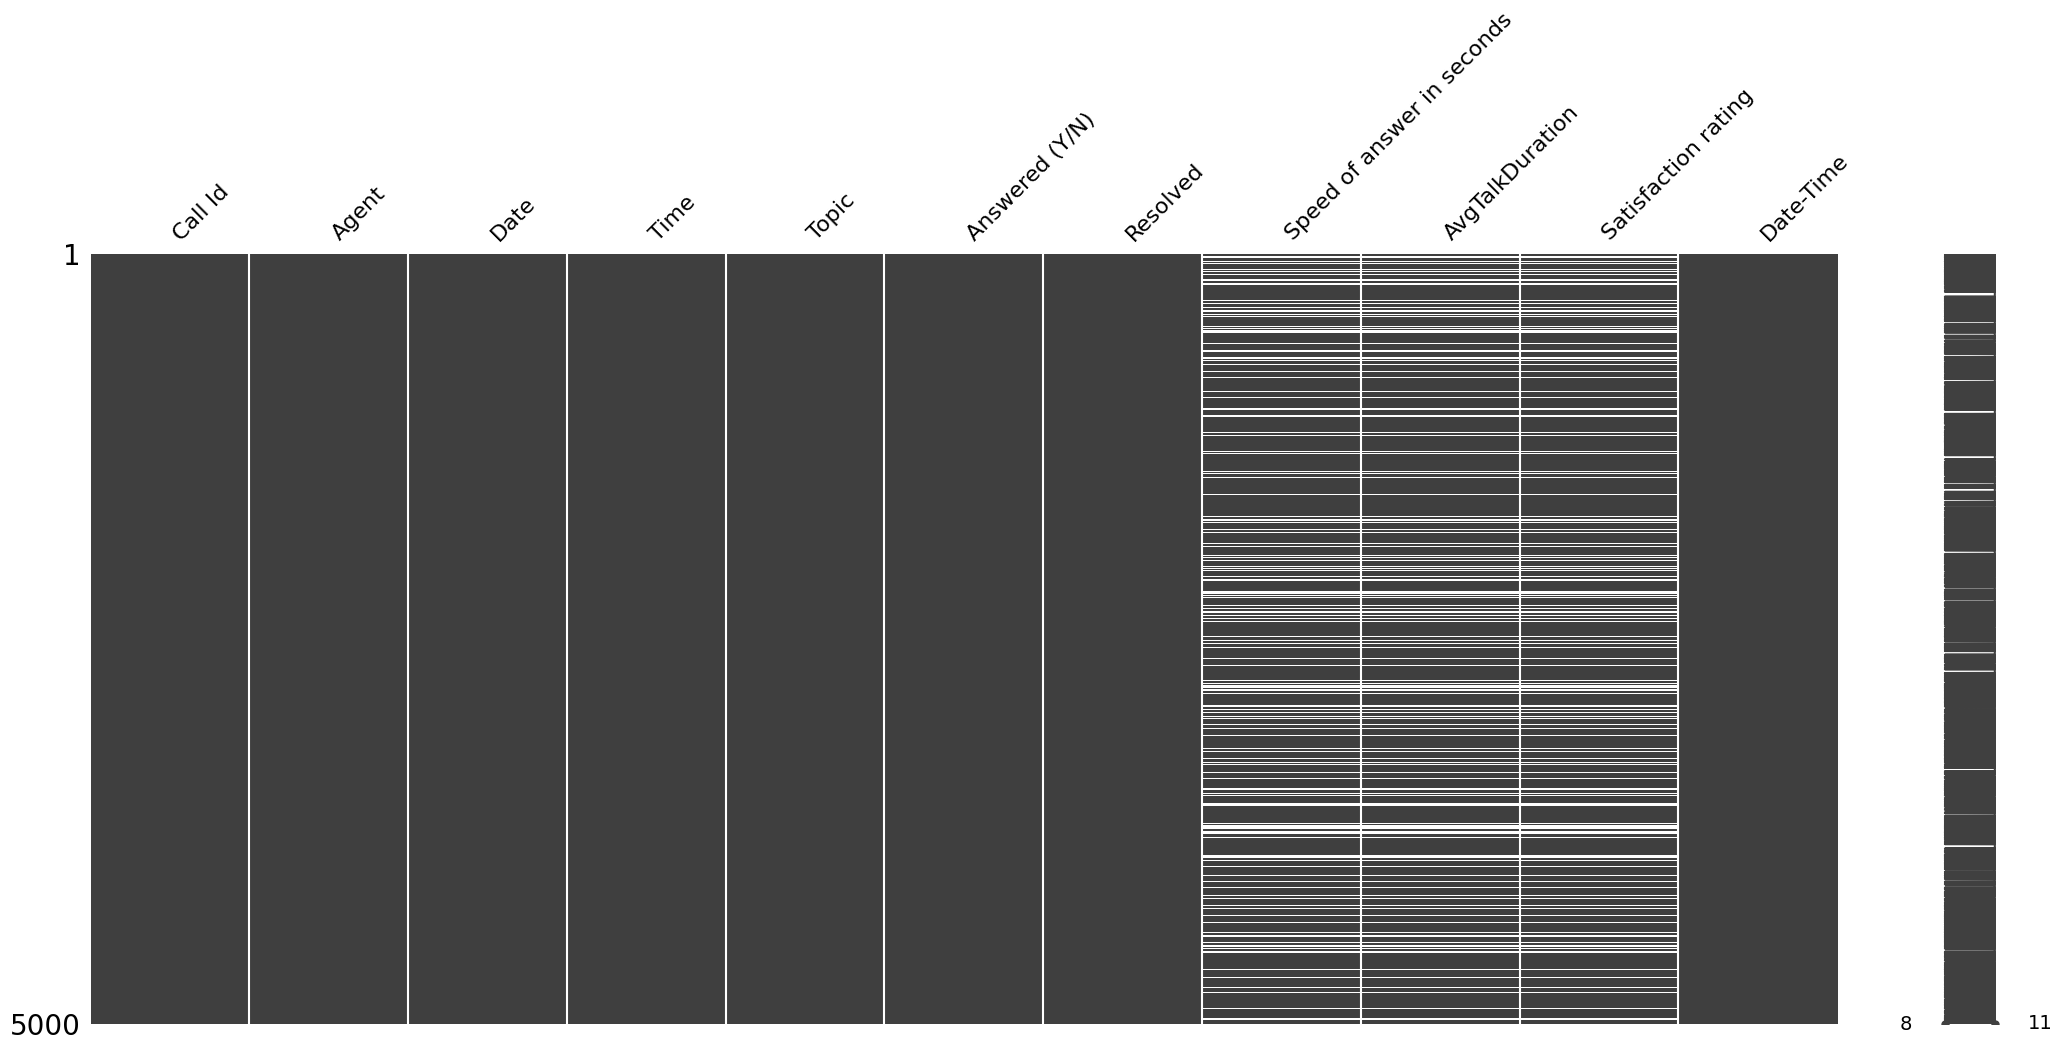

In [8]:
import missingno

missingno.matrix(df);

In [10]:
# !! Answer Me!! Which rows corresponds to missing (NaN) speed of answer?
df.loc[df['AvgTalkDuration'].isna()]['Answered (Y/N)'].value_counts()

,count
Answered (Y/N),
N,946


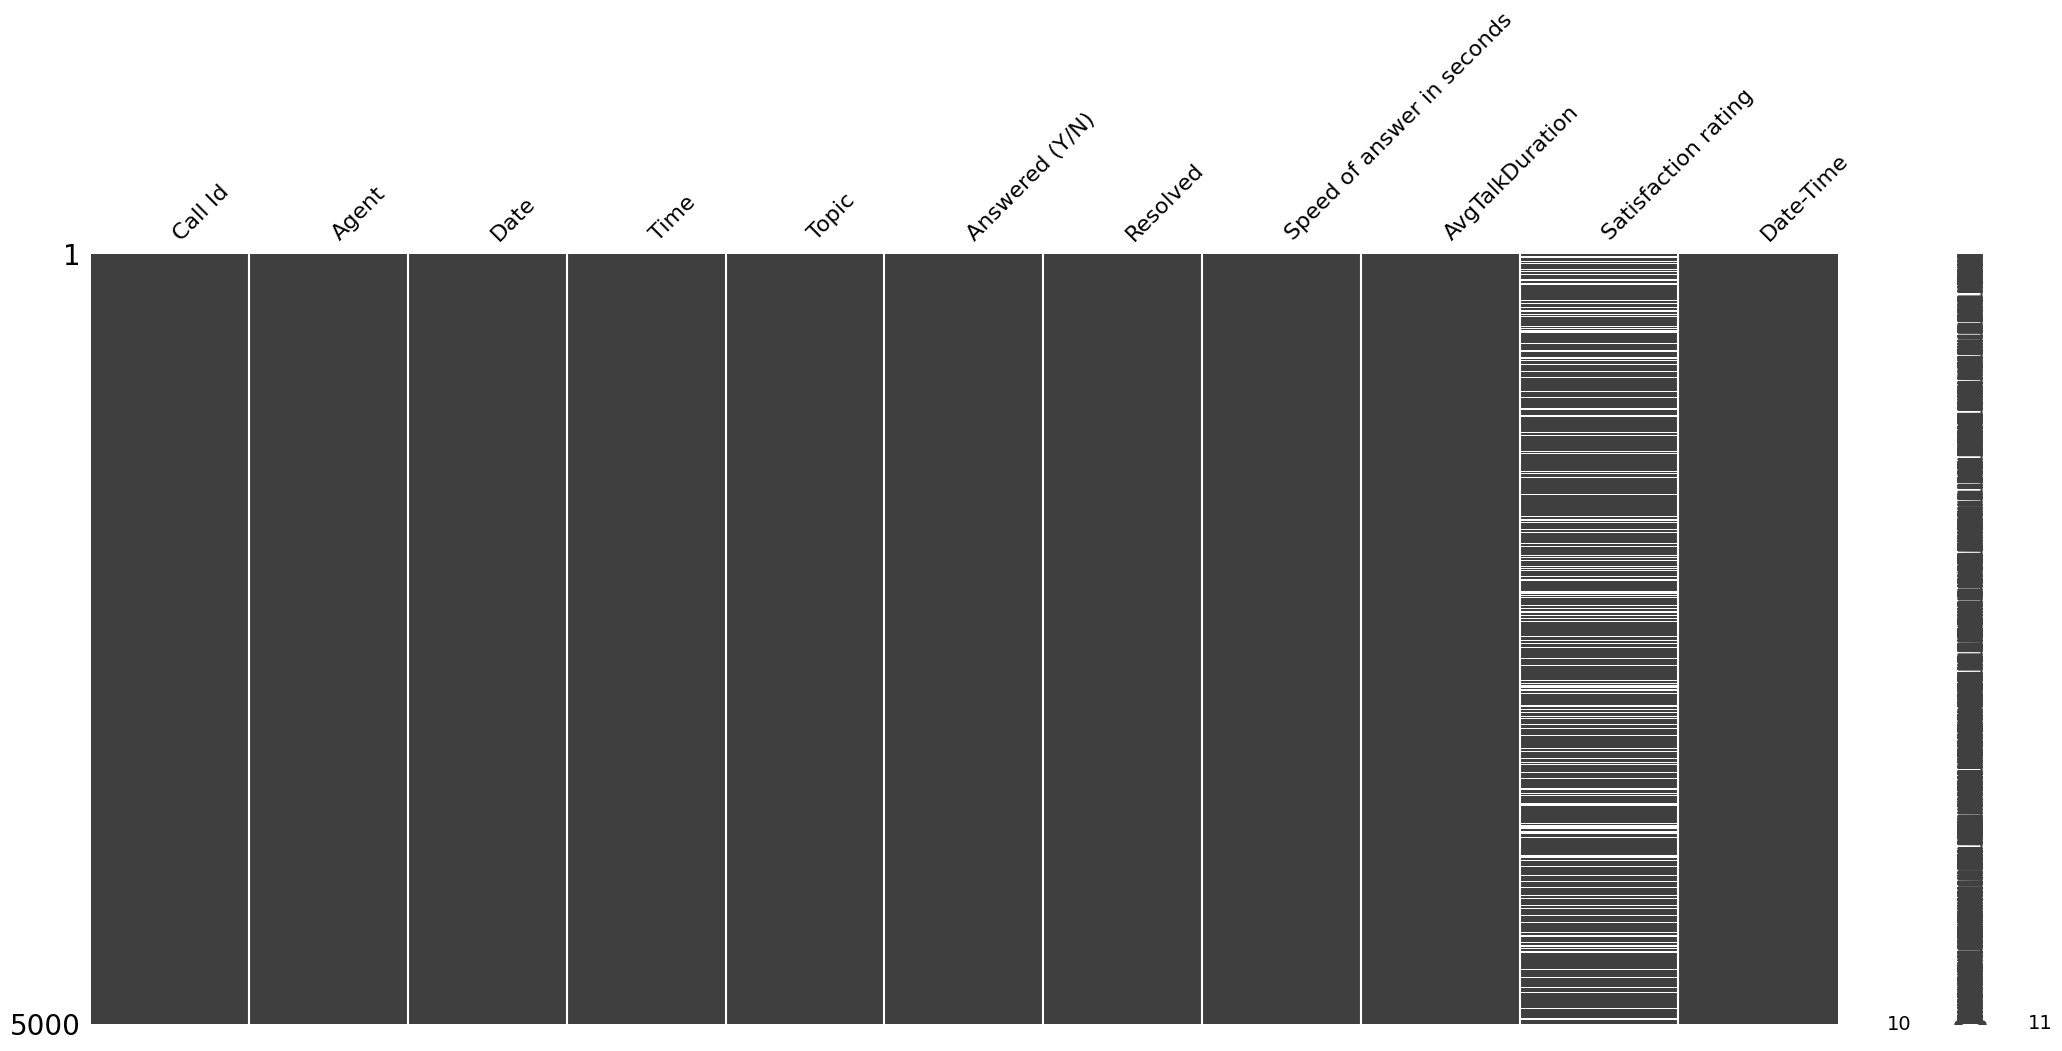

In [11]:
# changing NaN to appropriate values
df['Speed of answer in seconds'] = df['Speed of answer in seconds'].fillna(0)
df['AvgTalkDuration'] = df['AvgTalkDuration'].fillna(0)

missingno.matrix(df);

In [7]:
# reconstruct answered calls to compute for answer rate
df['Answered'] = [1 if df.loc[i, 'Answered (Y/N)'] == "Y" else 0 for i in range(len(df))]
df['Not Answered'] = [1 if df.loc[i, 'Answered (Y/N)'] == "N" else 0 for i in range(len(df))]


# !! Answer Me !! Can you reconstruct resolved calls to compute for resolution rate
df['Resolved (Y/N)'] = df['Resolved']
df['Resolved'] = [1 if df.loc[i, 'Resolved (Y/N)'] == "Y" else 0 for i in range(len(df))]
df['Not Resolved'] = [1 if df.loc[i, 'Resolved (Y/N)'] == "N" else 0 for i in range(len(df))]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   object        
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   int64         
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   float64       
 9   Satisfaction rating         4054 non-null   float64       
 10  Date-Time                   5000 non-null   datetime64[ns]
 11  Answered                    5000 non-null   int64         
 1

## Creating Data Fields for Analyses and More Data Preparation

Now that we have prepared the data and applied all necessary cleaning and preprocessing technique, we're now going to create some data fields and pivot tables that will give us in-depth analysis of our dataset.

Things that we'll look into:
1. Agent performance across different **time fields** (hourly, daily, weekly,
monthly)
  - number of calls handled
  - average talk duration
  - average speed of answer
  - average satisfation rating
  - answer rate
  - resolution rate
2. Overall performance of the Telecom Company
  - same metrics as above
  - topics concerned vs resolution

In [12]:
df['Date-Time'].dt.strftime('%H')

0       09
1       09
2       09
3       09
4       10
        ..
4995    16
4996    16
4997    16
4998    17
4999    17
Name: Date-Time, Length: 5000, dtype: object

In [8]:
# creating time fields

df['Hour'] = df['Date-Time'].dt.strftime('%-H').astype(int)

df['Weekday'] = df['Date-Time'].dt.strftime('%a')

df['Week'] = df['Date-Time'].dt.strftime('%-U').astype(int) + 1  # sunday as first day of week

df['Month'] = df['Date-Time'].dt.strftime('%b')

ValueError: invalid literal for int() with base 10: '2021-01-01 09:12:58'

In [14]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Date-Time,Answered,Not Answered,Resolved (Y/N),Not Resolved,Hour,Weekday,Week,Month
0,ID0001,Diane,2021-01-01,09:12:58,Complaint,Y,1,109.0,143.0,3.0,2021-01-01 09:12:58,1,0,Y,0,9,Fri,1,Jan
1,ID0002,Becky,2021-01-01,09:12:58,Appointment,Y,0,70.0,242.0,3.0,2021-01-01 09:12:58,1,0,N,1,9,Fri,1,Jan
2,ID0003,Stewart,2021-01-01,09:47:31,Complaint,Y,1,10.0,131.0,3.0,2021-01-01 09:47:31,1,0,Y,0,9,Fri,1,Jan
3,ID0004,Greg,2021-01-01,09:47:31,Complaint,Y,1,53.0,37.0,2.0,2021-01-01 09:47:31,1,0,Y,0,9,Fri,1,Jan
4,ID0005,Becky,2021-01-01,10:00:29,Insurance or Billing,Y,1,95.0,60.0,3.0,2021-01-01 10:00:29,1,0,Y,0,10,Fri,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Insurance or Billing,Y,1,22.0,340.0,1.0,2021-03-31 16:37:55,1,0,Y,0,16,Wed,14,Mar
4996,ID4997,Diane,2021-03-31,16:45:07,Insurance or Billing,Y,1,100.0,196.0,3.0,2021-03-31 16:45:07,1,0,Y,0,16,Wed,14,Mar
4997,ID4998,Diane,2021-03-31,16:53:46,Insurance or Billing,Y,1,84.0,109.0,4.0,2021-03-31 16:53:46,1,0,Y,0,16,Wed,14,Mar
4998,ID4999,Jim,2021-03-31,17:02:24,Medical Consultation,Y,1,98.0,58.0,5.0,2021-03-31 17:02:24,1,0,Y,0,17,Wed,14,Mar


In [15]:
# remove unnecessary columns and rearrange kept ones
df = df.loc[:, ['Agent', 'Hour', 'Weekday', 'Week', 'Month',
                'Topic', 'Answered', 'Not Answered', 'Resolved', 'Not Resolved',
                'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating']]

df

,Agent,Hour,Weekday,Week,Month,Topic,Answered,Not Answered,Resolved,Not Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,Diane,9,Fri,1,Jan,Complaint,1,0,1,0,109.0,143.0,3.0
1,Becky,9,Fri,1,Jan,Appointment,1,0,0,1,70.0,242.0,3.0
2,Stewart,9,Fri,1,Jan,Complaint,1,0,1,0,10.0,131.0,3.0
3,Greg,9,Fri,1,Jan,Complaint,1,0,1,0,53.0,37.0,2.0
4,Becky,10,Fri,1,Jan,Insurance or Billing,1,0,1,0,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jim,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,22.0,340.0,1.0
4996,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,100.0,196.0,3.0
4997,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,84.0,109.0,4.0
4998,Jim,17,Wed,14,Mar,Medical Consultation,1,0,1,0,98.0,58.0,5.0


In [ ]:
# !! Answer Me !! Create a variable for the metrics
metrics = df.columns[6:]

metrics

Index(['Answered', 'Not Answered', 'Resolved', 'Not Resolved',
       'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating'],
      dtype='object')

## Agent-level Analysis

In this part, we'll focus on analyzing agent performance using the difference metrics across various time fields. For this, we'll need to aggregate the values appropriately according to the time field we're considering. We can do this using some pivot tables.

### Overall Aggregations

In [ ]:
df_agent = df.pivot_table(
    index='Agent',
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_agent

,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds
Agent,,,,,,,
Becky,505,180.261490,126,180,451,3.371373,53.527734
Dan,533,191.014218,100,150,483,3.447419,55.590837
Diane,509,173.295419,124,180,453,3.405190,52.448657
Greg,508,182.459936,116,164,460,3.404382,55.062500
Jim,539,183.587087,127,178,488,3.393657,53.393393
Joe,479,182.908938,114,160,433,3.330579,57.939292
Martha,508,180.242947,130,183,455,3.470817,55.982759
Stewart,473,185.395189,109,159,423,3.400419,54.243986


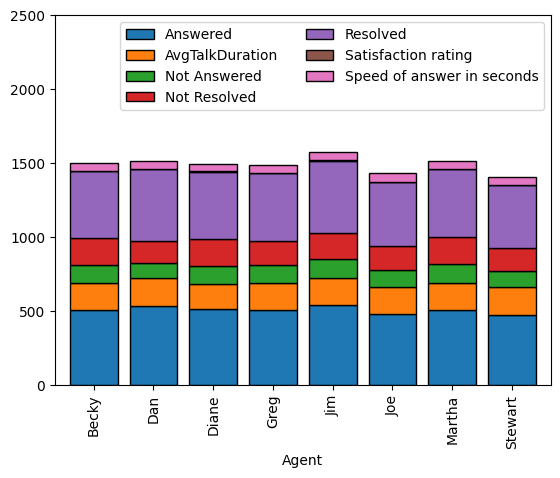

In [ ]:
# plot barchart of overall agent performance (combined metrics)
df_agent.plot(kind='bar', width=0.8, edgecolor='black', stacked=True, legend=True)
plt.xlabel('Agent')

plt.legend(loc='best', ncol=2)
plt.ylim([0, 2500])
plt.show()

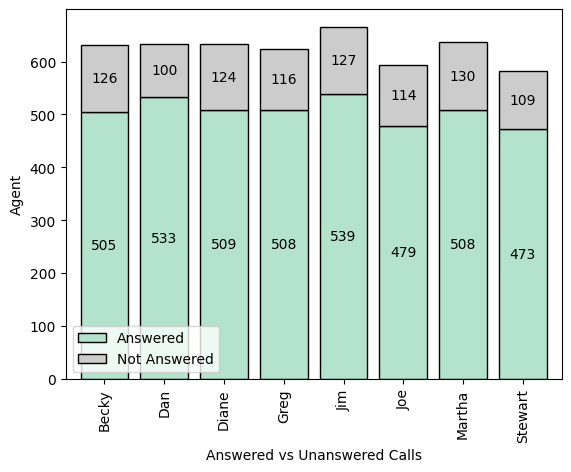

In [ ]:
# plot bar chart
ax = df_agent.plot(kind='bar', y=['Answered', 'Not Answered'],
              stacked=True, cmap='Pastel2',
              width=0.8, edgecolor='black')

# add text to stacked bar chart
for containers in ax.containers:
    ax.bar_label(containers, fmt='%.0f', label_type='center')

plt.xlabel('Answered vs Unanswered Calls')
plt.ylabel('Agent')
plt.legend(loc='lower left')
plt.show()

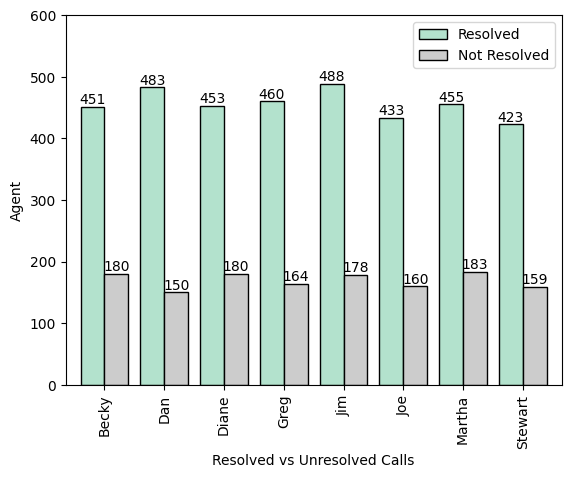

In [ ]:
# !! Answer Me!! Can you the same plot as above but comparing Resolved and Unresolved Calls?

ax = df_agent.plot(kind='bar', y=['Resolved', 'Not Resolved'],
              stacked=False, cmap='Pastel2',
              width=0.8, edgecolor='black')

# add text to stacked bar chart
for containers in ax.containers:
    ax.bar_label(containers, fmt='%.0f', label_type='edge')

plt.xlabel('Resolved vs Unresolved Calls')
plt.ylabel('Agent')
plt.legend(loc='best')
plt.ylim([0, 600])
plt.show()

### Monthly, Weekly, and Weekdays Aggregations

To create a pivot table with another layer of aggregation, that is by month, we just apply some changes in our index argument.

In [ ]:
df_agent_month = df.pivot_table(
    index=['Agent', 'Month'],
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_agent_month.head(9)

Answered  AvgTalkDuration  Not Answered  Not Resolved  Resolved  \
Agent Month                                                                    
Becky Feb         161       190.283019            51            66       146   
      Jan         179       180.550926            37            60       156   
      Mar         165       169.487685            38            54       149   
Dan   Feb         174       184.233333            36            51       159   
      Jan         193       198.709251            34            49       178   
      Mar         166       189.367347            30            50       146   
Diane Feb         164       167.842365            39            58       145   
      Jan         186       184.076577            36            54       168   
      Mar         159       167.110577            49            68       140   

             Satisfaction rating  Speed of answer in seconds  
Agent Month                                                   
Becky Feb               3.305882                   54.278302  
      Jan               3.384181                   52.731481  
      Mar               3.423529                   53.591133  
Dan   Feb               3.523529                   53.457143  
      Jan               3.489474                   56.039648  
      Mar               3.319018                   57.357143  
Diane Feb               3.369427                   53.561576  
      Jan               3.427027                   53.279279  
      Mar               3.415094                   50.475962

In [ ]:
# arrange month columns
df_agent_month = df_agent_month.reindex(['Jan', 'Feb', 'Mar'], level='Month')

df_agent_month.head(9)

Answered  AvgTalkDuration  Not Answered  Not Resolved  Resolved  \
Agent Month                                                                    
Becky Jan         179       180.550926            37            60       156   
      Feb         161       190.283019            51            66       146   
      Mar         165       169.487685            38            54       149   
Dan   Jan         193       198.709251            34            49       178   
      Feb         174       184.233333            36            51       159   
      Mar         166       189.367347            30            50       146   
Diane Jan         186       184.076577            36            54       168   
      Feb         164       167.842365            39            58       145   
      Mar         159       167.110577            49            68       140   

             Satisfaction rating  Speed of answer in seconds  
Agent Month                                                   
Becky Jan               3.384181                   52.731481  
      Feb               3.305882                   54.278302  
      Mar               3.423529                   53.591133  
Dan   Jan               3.489474                   56.039648  
      Feb               3.523529                   53.457143  
      Mar               3.319018                   57.357143  
Diane Jan               3.427027                   53.279279  
      Feb               3.369427                   53.561576  
      Mar               3.415094                   50.475962

In [ ]:
# !! Answer Me !! Create a pivot table of agent-level metrics by week
df_agent_week = df.pivot_table(
    index=['Agent', 'Week'],
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_agent_week.head(15)

Answered  AvgTalkDuration  Not Answered  Not Resolved  Resolved  \
Agent Week                                                                    
Becky 1           15       161.470588             2             4        13   
      2           31       206.055556             5            11        25   
      3           47       171.456140            10            14        43   
      4           38       161.478261             8            15        31   
      5           41       188.846154            11            15        37   
      6           44       201.566038             9            13        40   
      7           38       182.773585            15            17        36   
      8           40       209.865385            12            15        37   
      9           39       169.000000            15            19        35   
      10          52       180.968254            11            15        48   
      11          40       196.000000             5            13        32   
      12          27       148.783784            10            11        26   
      13          40       162.255319             7            11        36   
      14          13       147.368421             6             7        12   
Dan   1           13       250.428571             1             1        13   

            Satisfaction rating  Speed of answer in seconds  
Agent Week                                                   
Becky 1                3.266667                   69.352941  
      2                3.344828                   54.722222  
      3                3.395833                   52.947368  
      4                3.388889                   50.195652  
      5                3.341463                   47.192308  
      6                3.416667                   58.301887  
      7                3.769231                   50.773585  
      8                3.209302                   59.346154  
      9                3.000000                   47.074074  
      10               3.581818                   59.158730  
      11               3.000000                   56.311111  
      12               3.592593                   44.918919  
      13               3.425000                   53.234043  
      14               3.500000                   53.263158  
Dan   1                3.636364                   63.857143

If we need to set the dataframe not to have a multi-index structure, we can apply the reset_index function.

In [ ]:
# set week as a column
df_agent_week = df_agent_week.reset_index('Agent')

df_agent_week

,Agent,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds
Week,,,,,,,,
1,Becky,15,161.470588,2,4,13,3.266667,69.352941
2,Becky,31,206.055556,5,11,25,3.344828,54.722222
3,Becky,47,171.456140,10,14,43,3.395833,52.947368
4,Becky,38,161.478261,8,15,31,3.388889,50.195652
5,Becky,41,188.846154,11,15,37,3.341463,47.192308
...,...,...,...,...,...,...,...,...
10,Stewart,40,189.022222,5,7,38,3.289474,55.844444
11,Stewart,32,186.600000,8,8,32,3.878788,52.100000
12,Stewart,31,182.846154,8,11,28,3.250000,52.307692


In [ ]:
# !! Answer Me!! From the reconstructed dataframe, how can we pull data for one agent only?
df_agent_week.loc[df_agent_week['Agent'] == 'Stewart', ['AvgTalkDuration']]

,AvgTalkDuration
Week,
1,185.928571
2,201.458333
3,152.271186
4,163.041667
5,180.716981
6,195.122449
7,151.193548
8,176.444444
9,224.102564


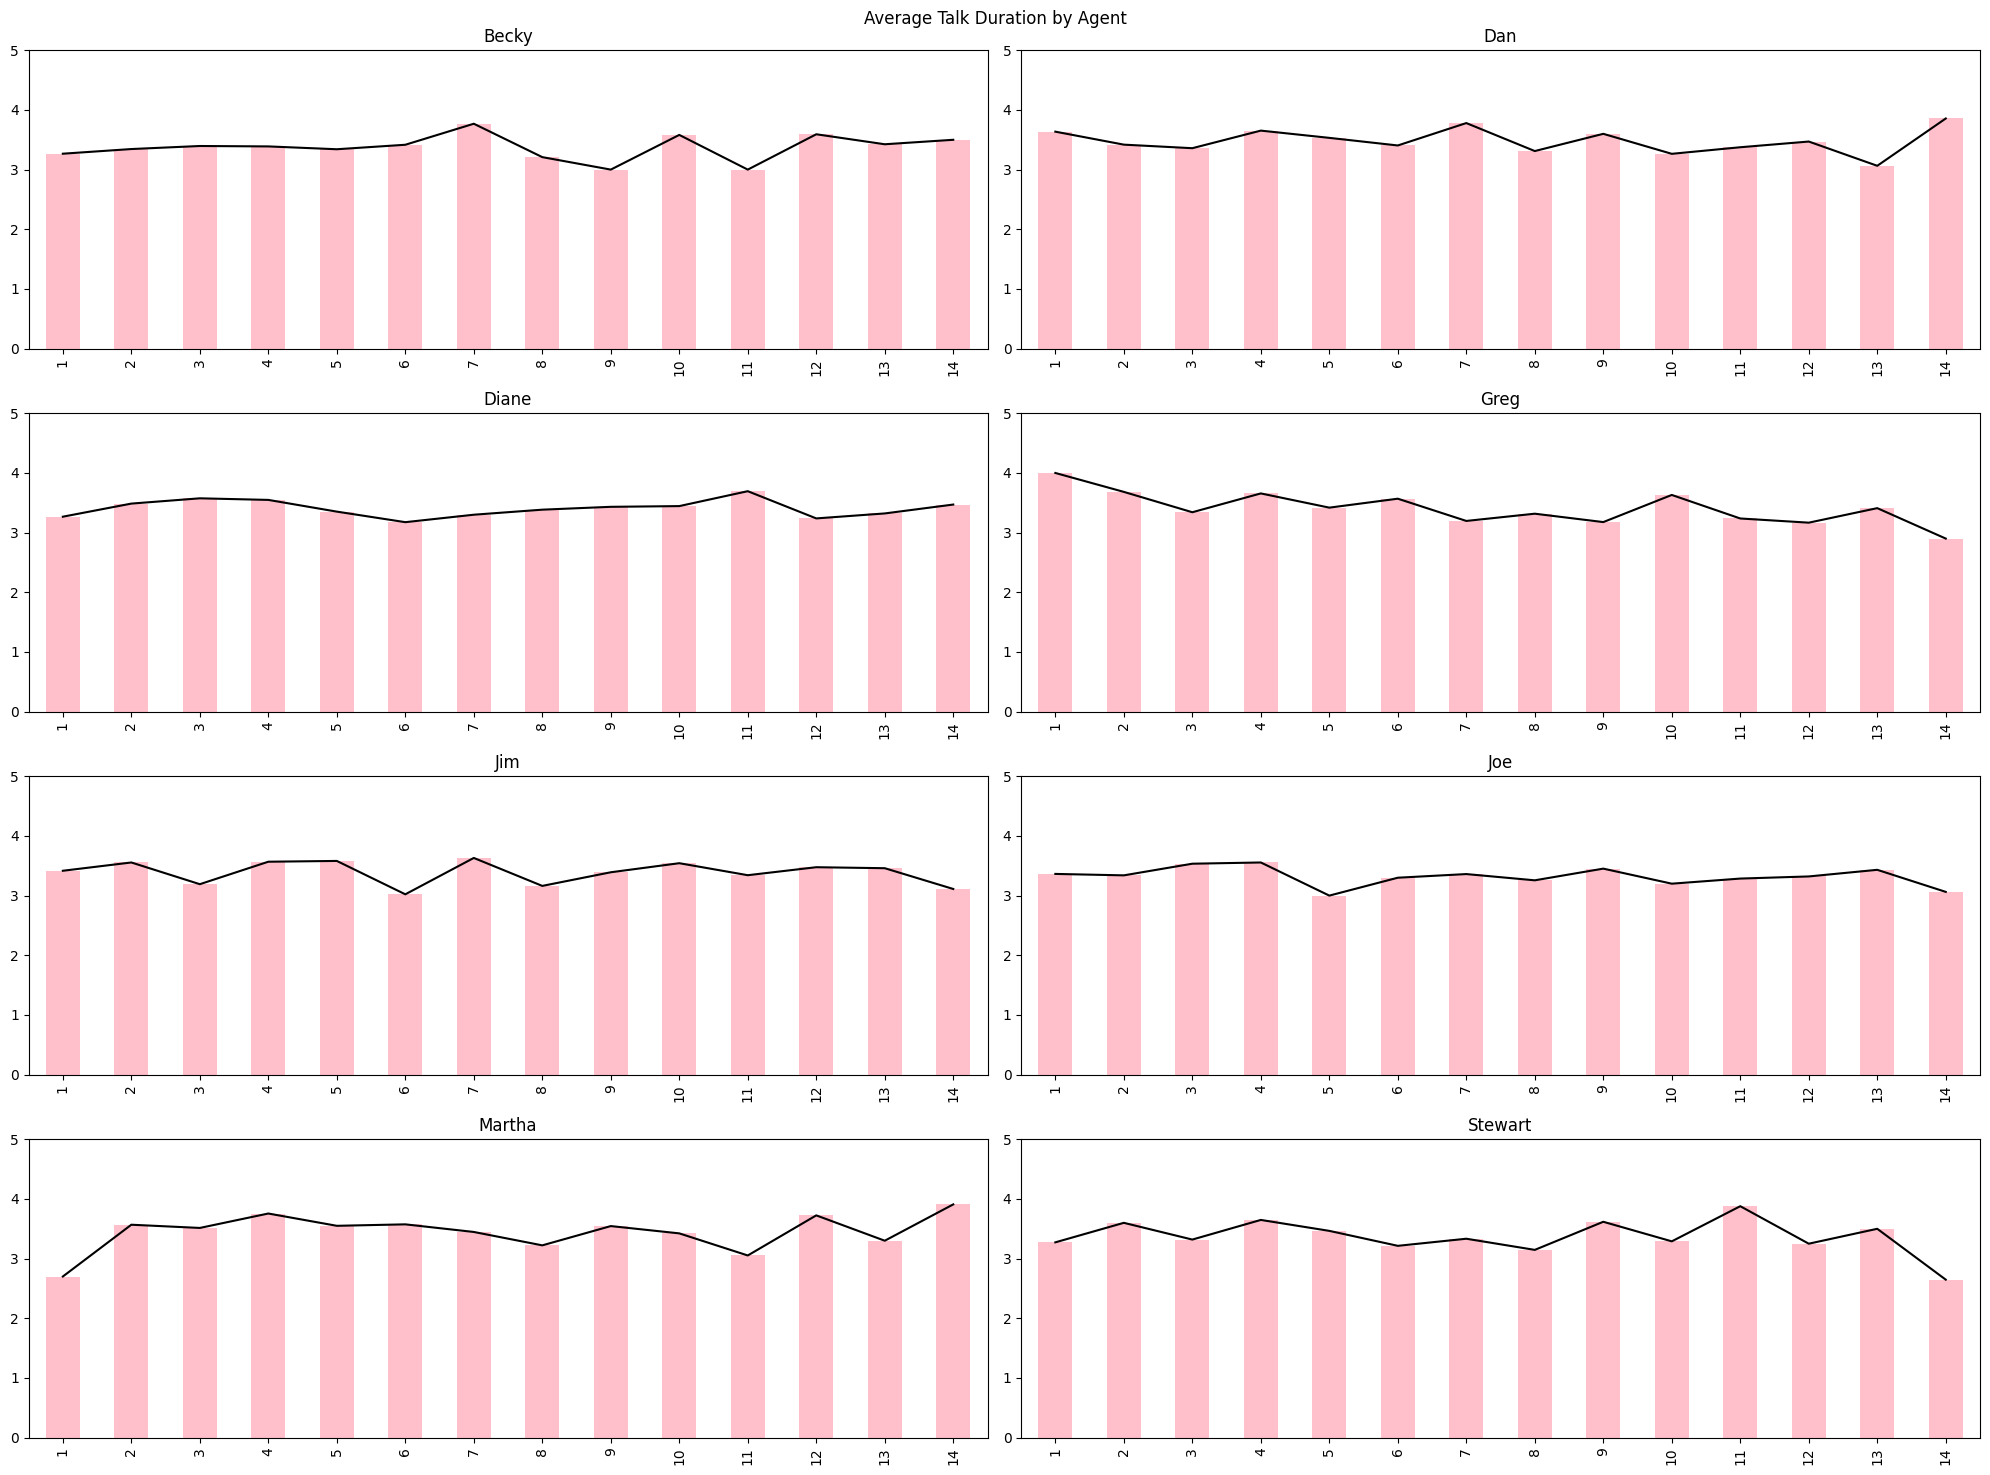

In [ ]:
names = df_agent_week['Agent'].unique()
met = 'Satisfaction rating'

fig, axs = plt.subplots(4,2, figsize=(20, 15))
axs = axs.flatten()

for i in range(len(axs)):
  df_agent_week.loc[df_agent_week['Agent'] == names[i], [met]].reset_index(drop=True).plot(kind='line', ax=axs[i],
                                                                                           color='black', legend=False)

  df_agent_week.loc[df_agent_week['Agent'] == names[i], [met]].reset_index(drop=True).plot(kind='bar', ax=axs[i],
                                                                                           color='pink', legend=False)
  axs[i].set_title(names[i])
  axs[i].set_ylim([0,5])
  axs[i].set_xticks(np.arange(14), np.arange(14)+1)


plt.suptitle('Average Talk Duration by Agent')
plt.tight_layout()
plt.show()

Now, suppose that the team leaders want to analyze the performance of their agents on the weekday level comparison. Particularly, they'd want to look into who among the agents are not performing well in terms of calls answered and concerns resolved.

To provide this insight, implement a similar process to the monthly/weekly analysis above. But this time, use both the *Not Answered* and *Not Resolved* as the metrics of comparison.


**Suggestion:** Try to use an area chart to visualize this.

In [ ]:
# !! Answer Me !! Create the same aggregation for the weekday
df_agent_weekday = df.pivot_table(
    index=['Agent', 'Weekday'],
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

# arrange weekdays
df_agent_weekday = df_agent_weekday.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], level='Weekday')

# remove multi-index
df_agent_weekday = df_agent_weekday.reset_index('Agent')

df_agent_weekday.head(10)

,Agent,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds
Weekday,,,,,,,,
Mon,Becky,83,154.203540,30,37,76,3.558140,54.601770
Tue,Becky,63,200.936709,16,26,53,3.279412,50.341772
Wed,Becky,58,179.140845,13,19,52,3.350000,57.098592
Thu,Becky,61,170.276316,15,18,58,3.306452,55.223684
Fri,Becky,78,191.851064,16,26,68,3.376623,48.925532
Sat,Becky,89,186.601852,19,29,79,3.355556,52.898148
Sun,Becky,73,184.433333,17,25,65,3.324324,56.288889
Mon,Dan,83,193.708333,13,26,70,3.432099,59.854167
Tue,Dan,77,178.348315,12,16,73,3.459459,57.842697


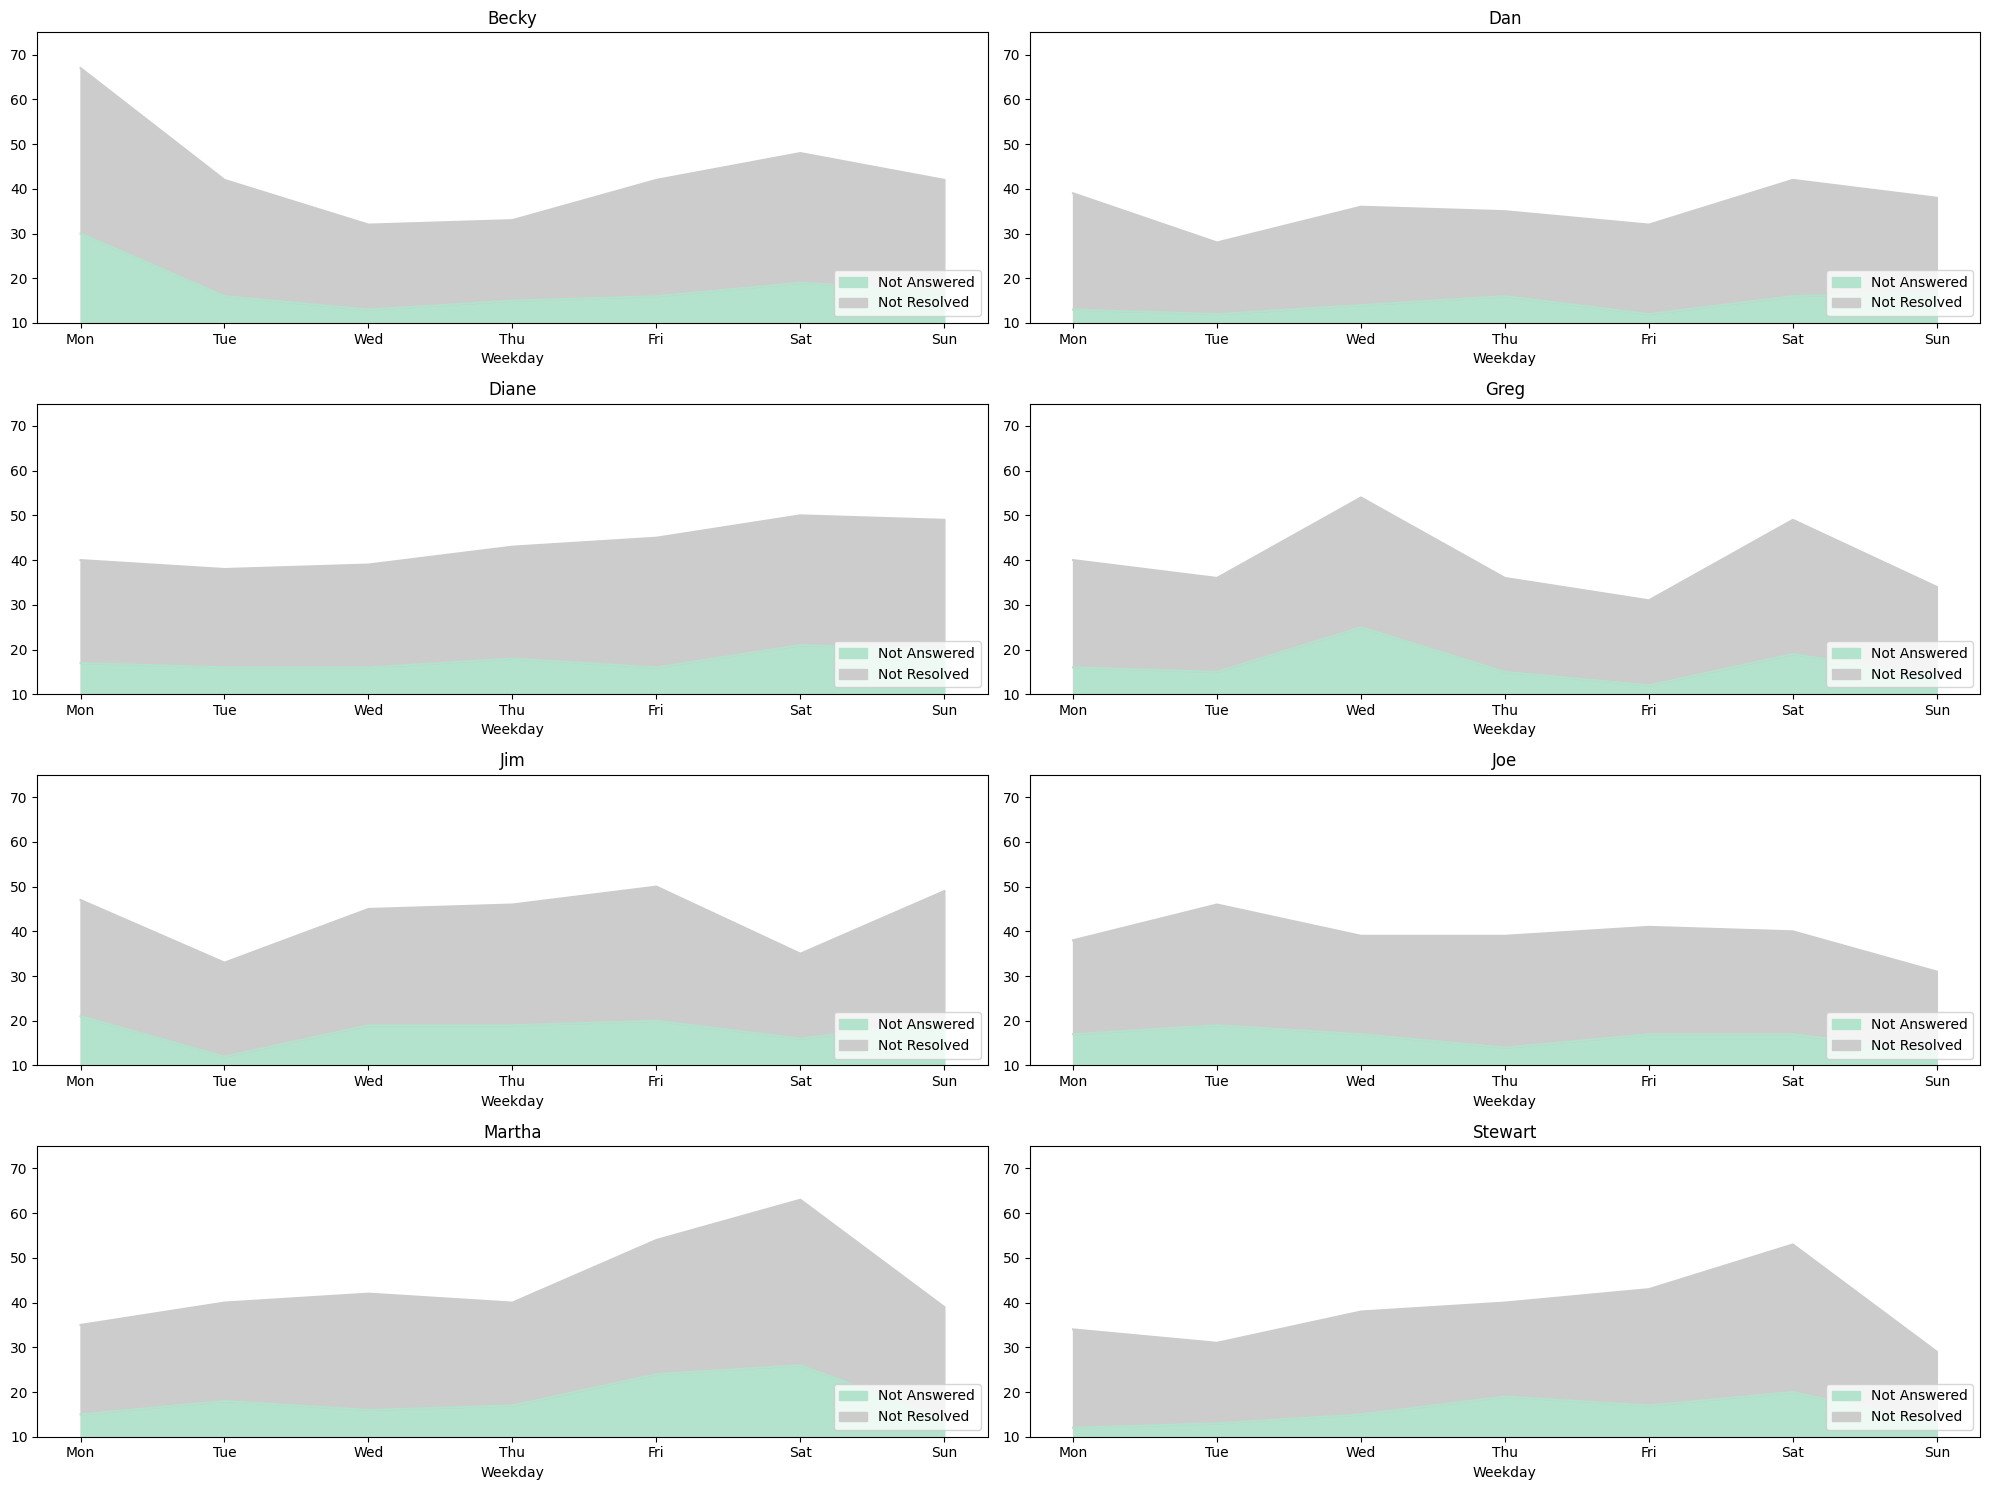

In [ ]:
names = df_agent_weekday['Agent'].unique()
met = ['Not Answered', 'Not Resolved']

fig, axs = plt.subplots(4,2, figsize=(20, 15))
axs = axs.flatten()

for i in range(len(axs)):
  df_agent_weekday.loc[df_agent_weekday['Agent'] == names[i], met].plot(kind='area', ax=axs[i], cmap='Pastel2',
                                                                        legend=True)

  axs[i].set_title(names[i])
  axs[i].set_ylim([10,75])
  axs[i].legend(loc='lower right')


# plt.suptitle('Average Talk Duration by Agent')
plt.tight_layout()
plt.show()

## Company-level Analysis

Now, suppose we want to look the overall picture of our dataset to construct more senior-level decisions. For this, we'll still be creating pivot tables but this time, only pivoting on time fields.


Some questions we'd like to answer:
1. What topic is usually the concern for the call? Which of these topics is usually unresolved?
2. Is there a specific time window where more calls are being unanswered/unresolved? Does satisfaction drop during these time?
3. What contributes to higher satisfaction?


To answer the first question we create a pivot table aggregated by topic and create a column for the total number of calls.

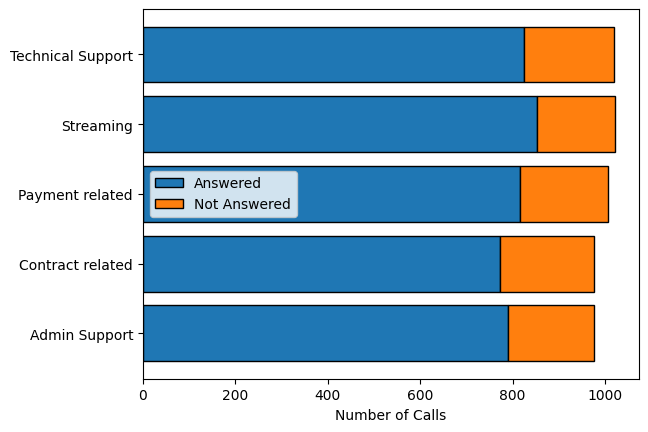

In [ ]:
df_topic = df.pivot_table(
    index='Topic',
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_topic['Calls'] = df_topic['Answered'] + df_topic['Not Answered']

df_topic.plot(kind='barh', y=['Answered', 'Not Answered'], stacked=True, width=0.8, edgecolor='black', legend=True)

plt.ylabel('')
plt.xlabel('Number of Calls')
plt.legend(loc='center left')
plt.show()

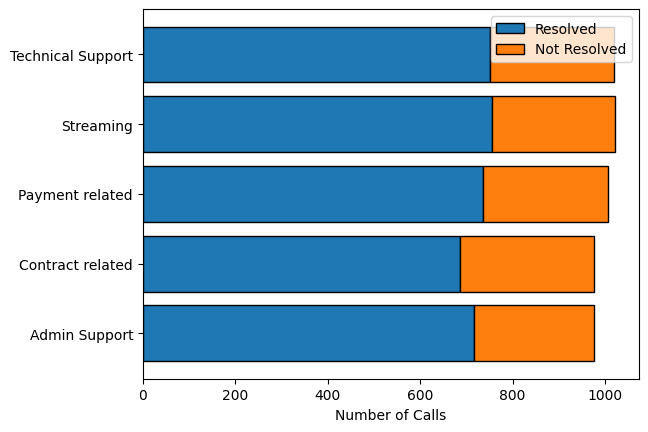

In [ ]:
# !! Try Me !! Create the same plot but for Resolved vs Not Resolved
# !! Answer Me !! Which of the following topics is usually unresolved?
df_topic.plot(kind='barh', y=['Resolved', 'Not Resolved'], stacked=True, width=0.8, edgecolor='black', legend=True)

plt.ylabel('')
plt.xlabel('Number of Calls')
plt.show()

To answer the second question we create a pivot table aggregated by hour and create columns for the unanswer and unresolved ratio. We compare this correspondingly with the average satisfaction.

In [ ]:
df_hour = df.pivot_table(
    index='Hour',
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_hour['Unanswer Ratio'] = df_hour['Not Answered'] / (df_hour['Answered'] + df_hour['Not Answered'])
df_hour['Unresolved Ratio'] = df_hour['Not Resolved'] / (df_hour['Resolved'] + df_hour['Not Resolved'])

df_hour

,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Unanswer Ratio,Unresolved Ratio
Hour,,,,,,,,,
9,436,176.363803,111,154,393,3.536697,51.683729,0.202925,0.281536
10,432,188.688091,97,129,400,3.462963,58.045369,0.183365,0.243856
11,481,180.828814,109,156,434,3.426195,55.286441,0.184746,0.264407
12,431,180.775137,116,156,391,3.371230,53.127971,0.212066,0.285192
13,484,177.267677,110,159,435,3.392562,55.166667,0.185185,0.267677
14,406,185.202405,93,141,358,3.266010,55.064128,0.186373,0.282565
15,435,181.337100,96,139,392,3.367816,54.615819,0.180791,0.261770
16,462,187.314488,104,159,407,3.426407,55.742049,0.183746,0.280919
17,475,182.627787,108,158,425,3.368421,54.142367,0.185249,0.271012


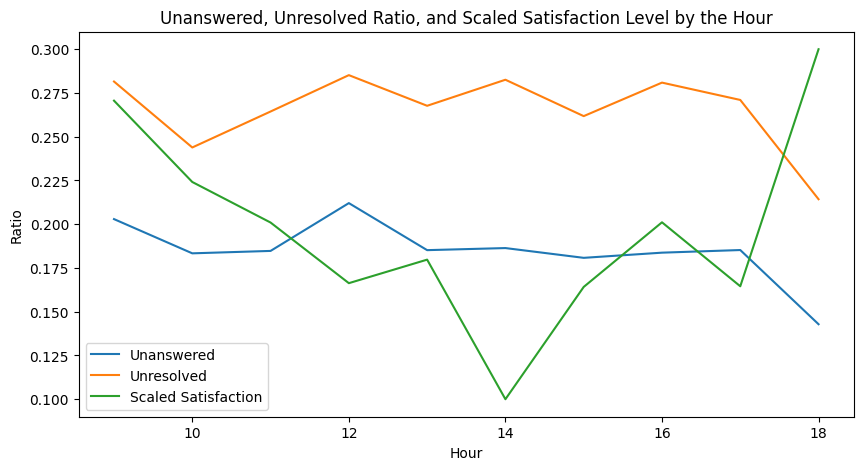

In [ ]:
fig = plt.figure(figsize=(10,5))

df_hour['Scaled Satisfaction rating'] = 0.1 + ((df_hour['Satisfaction rating'] - df_hour['Satisfaction rating'].min()) * (0.3-0.1)) / (df_hour['Satisfaction rating'].max() - df_hour['Satisfaction rating'].min())

plt.plot(df_hour.index, df_hour['Unanswer Ratio'], label='Unanswered')
plt.plot(df_hour.index, df_hour['Unresolved Ratio'], label='Unresolved')
plt.plot(df_hour.index, df_hour['Scaled Satisfaction rating'], label='Scaled Satisfaction')

plt.xlabel('Hour')
plt.ylabel('Ratio')
plt.title('Unanswered, Unresolved Ratio, and Scaled Satisfaction Level by the Hour')
plt.legend()
plt.show()

Finally, to answer the third question, we create a correlation heatmap and a corresponding scatter plot on the entire dataset, not aggregated by any field.

In [ ]:
df

,Agent,Hour,Weekday,Week,Month,Topic,Answered,Not Answered,Resolved,Not Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,Diane,9,Fri,1,Jan,Contract related,1,0,1,0,109.0,143.0,3.0
1,Becky,9,Fri,1,Jan,Technical Support,1,0,0,1,70.0,242.0,3.0
2,Stewart,9,Fri,1,Jan,Contract related,1,0,1,0,10.0,131.0,3.0
3,Greg,9,Fri,1,Jan,Contract related,1,0,1,0,53.0,37.0,2.0
4,Becky,10,Fri,1,Jan,Payment related,1,0,1,0,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jim,16,Wed,14,Mar,Payment related,1,0,1,0,22.0,340.0,1.0
4996,Diane,16,Wed,14,Mar,Payment related,1,0,1,0,100.0,196.0,3.0
4997,Diane,16,Wed,14,Mar,Payment related,1,0,1,0,84.0,109.0,4.0
4998,Jim,17,Wed,14,Mar,Streaming,1,0,1,0,98.0,58.0,5.0


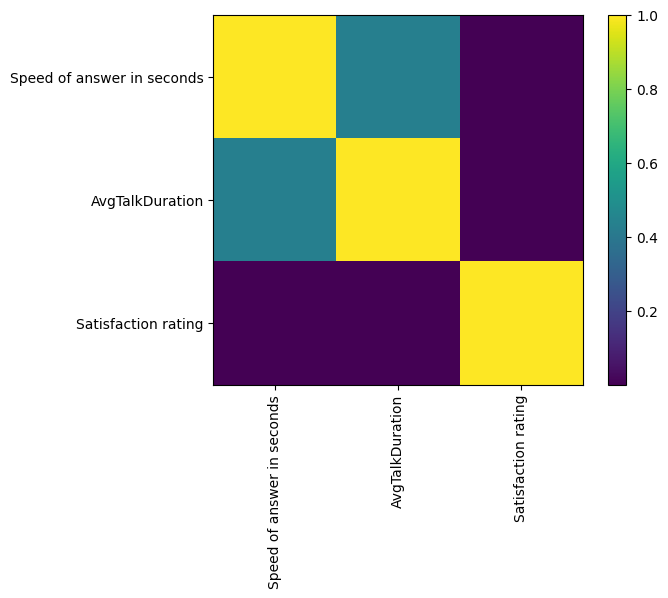

In [ ]:
plt.imshow(df.iloc[:, -3:].corr(), cmap='viridis')

# change the x- and y-tick labels
plt.xticks(range(len(metrics[-3:])), metrics[-3:], rotation=90)
plt.yticks(range(len(metrics[-3:])), metrics[-3:])
plt.colorbar()  # add a colorbar
plt.show()

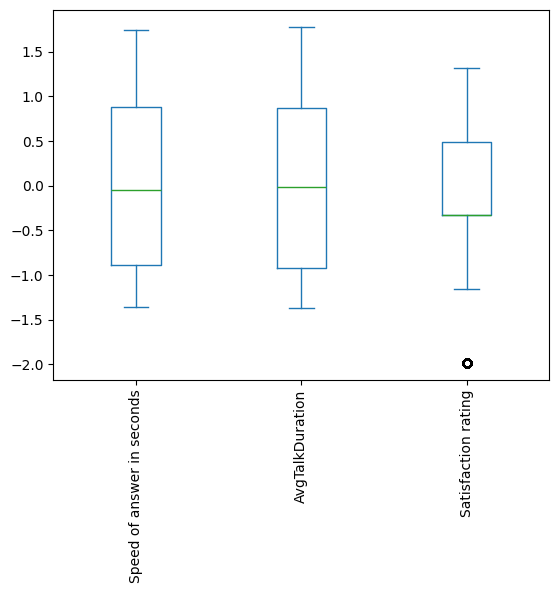

In [ ]:
normalized_df_metrics = (df[metrics] - df[metrics].mean())/df[metrics].std()  # standard scaling

normalized_df_metrics.iloc[:, -3:].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

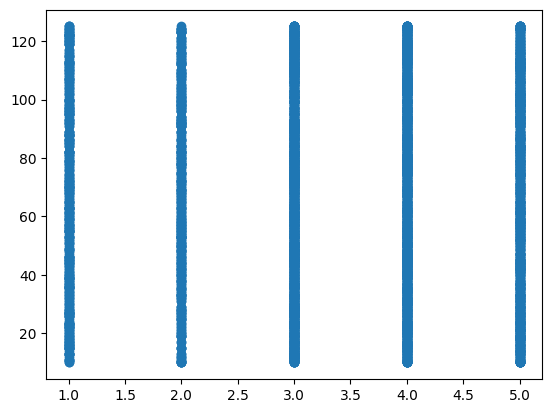

In [ ]:
plt.scatter(df['Satisfaction rating'], df['Speed of answer in seconds']);